In [1]:
# Install prophet & yfinance
!pip install prophet
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# Import Libraries
import pandas as pd
import plotly.express as px
from prophet import Prophet
import datetime as datetime
import yfinance as yf
from google.colab import files

In [3]:
# Initlialize Plotly
import plotly.io as pio
pio.renderers.default="colab"

In [4]:
#read time series data from Yahoo Finance by yfinance
#TSLA = yf.Ticker("TSLA") 
#start = datetime.datetime(2021,11,8)
#end = datetime.datetime(2022,11,6)
#df = TSLA.history(start=start, end=end, auto_adjust=True)

# print count of rows and columns
#print(df.shape)

# Displays top 5 rows
#df.head()

In [5]:
#if import data via url: 
url="https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1636181257&period2=1667717257&interval=1d&events=history&includeAdjustedClose=true"
df=pd.read_csv(url)  
print(df.shape) 
df.head()

(251, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-08,176.162003,178.949997,174.393005,174.449005,174.449005,61480000
1,2021-11-09,175.762497,179.688507,175.071503,178.811493,178.811493,85898000
2,2021-11-10,178.193497,180.272507,173.154495,174.102493,174.102493,80548000
3,2021-11-11,175.649994,177.162003,173.373505,173.625000,173.625000,45288000
4,2021-11-12,174.250000,177.036499,172.352493,176.257507,176.257507,53788000


In [6]:
# check for null values, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
# Statistical Analysis
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,138.893343,141.118389,136.422554,138.654721,138.654721,7.358680e+07
std,23.974087,23.825233,23.953227,23.832315,23.832315,3.357029e+07
min,91.489998,92.440002,88.040001,89.300003,89.300003,3.575400e+07
25%,115.895001,118.509998,113.840000,116.015000,116.015000,5.343880e+07
50%,140.100006,142.770004,137.318497,138.872498,138.872498,6.403200e+07
75%,158.933494,161.726997,157.252251,160.096497,160.096497,8.245075e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


In [8]:
# Visualize historical performance
px.area(df,x='Date', y='Close', title="Close Price History")

In [9]:
px.line(df,x='Date', y='Close', title="Close Price History")

In [10]:
px.area(df,x='Date', y='Volume', title="Volume History")

In [11]:
px.bar(df, y='Volume',title="Volume History")

In [12]:
px.box(df, y='Close', title="Close Price Box Plot")

In [13]:
# Data preparation for prophet
columns=['Date','Close']
ndf=pd.DataFrame(df, columns=columns)
print(ndf.shape)
ndf.head()

(251, 2)


,Date,Close
0,2021-11-08,174.449005
1,2021-11-09,178.811493
2,2021-11-10,174.102493
3,2021-11-11,173.625000
4,2021-11-12,176.257507


In [14]:
# Renaming as per prophet
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})
prophet_df.head()

,ds,y
0,2021-11-08,174.449005
1,2021-11-09,178.811493
2,2021-11-10,174.102493
3,2021-11-11,173.625000
4,2021-11-12,176.257507


In [15]:
# Prophet Model
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt7cv72ex/txat0038.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt7cv72ex/4urn605m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25945', 'data', 'file=/tmp/tmpt7cv72ex/txat0038.json', 'init=/tmp/tmpt7cv72ex/4urn605m.json', 'output', 'file=/tmp/tmpt7cv72ex/prophet_model2ujiql4w/prophet_model-20221106171832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
# Forecast of TSLA price over 30 days
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-08,177.229952,165.728216,191.041728,177.229952,177.229952,1.378352,1.378352,1.378352,1.378352,1.378352,1.378352,0.0,0.0,0.0,178.608305
1,2021-11-09,177.005063,165.221287,190.732525,177.005063,177.005063,0.837700,0.837700,0.837700,0.837700,0.837700,0.837700,0.0,0.0,0.0,177.842763
2,2021-11-10,176.780173,164.565867,190.140171,176.780173,176.780173,0.958718,0.958718,0.958718,0.958718,0.958718,0.958718,0.0,0.0,0.0,177.738891
3,2021-11-11,176.555284,164.280137,189.696279,176.555284,176.555284,0.449330,0.449330,0.449330,0.449330,0.449330,0.449330,0.0,0.0,0.0,177.004614
4,2021-11-12,176.330395,164.126857,189.118902,176.330395,176.330395,-0.173379,-0.173379,-0.173379,-0.173379,-0.173379,-0.173379,0.0,0.0,0.0,176.157015


In [17]:
px.line(forecast, x='ds', y='yhat',title="30 days forecast")

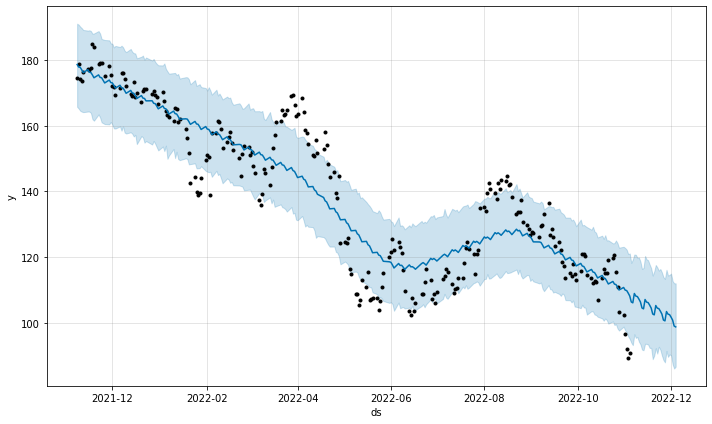

In [18]:
figure1=m.plot(forecast,xlabel='ds',ylabel='y')

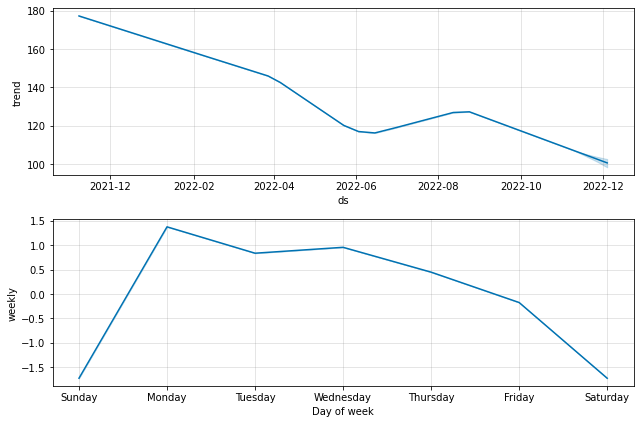

In [19]:
figure2=m.plot_components(forecast)

In [20]:
# Download forecast data
forecast.to_csv('forecast.csv')
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>